In [103]:
import pandas as pd
import numpy as np 
import matplotlib as matplot
import matplotlib.pyplot as plt
import yfinance as yf
import requests
from bs4 import BeautifulSoup

In [192]:
tesla = yf.Ticker("TSLA")


tesla_data = tesla.history(period='max')

print(tesla_data.columns)

tesla_data.tail()

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-07-15 00:00:00-04:00,319.679993,321.200012,310.500000,310.779999,77556300,0.0,0.0
2025-07-16 00:00:00-04:00,312.799988,323.500000,312.619995,321.670013,97284800,0.0,0.0
2025-07-17 00:00:00-04:00,323.149994,324.339996,317.059998,319.410004,73922900,0.0,0.0
2025-07-18 00:00:00-04:00,321.660004,330.899994,321.420013,329.649994,94010900,0.0,0.0
2025-07-21 00:00:00-04:00,334.359985,338.000000,326.880005,328.489990,73624128,0.0,0.0


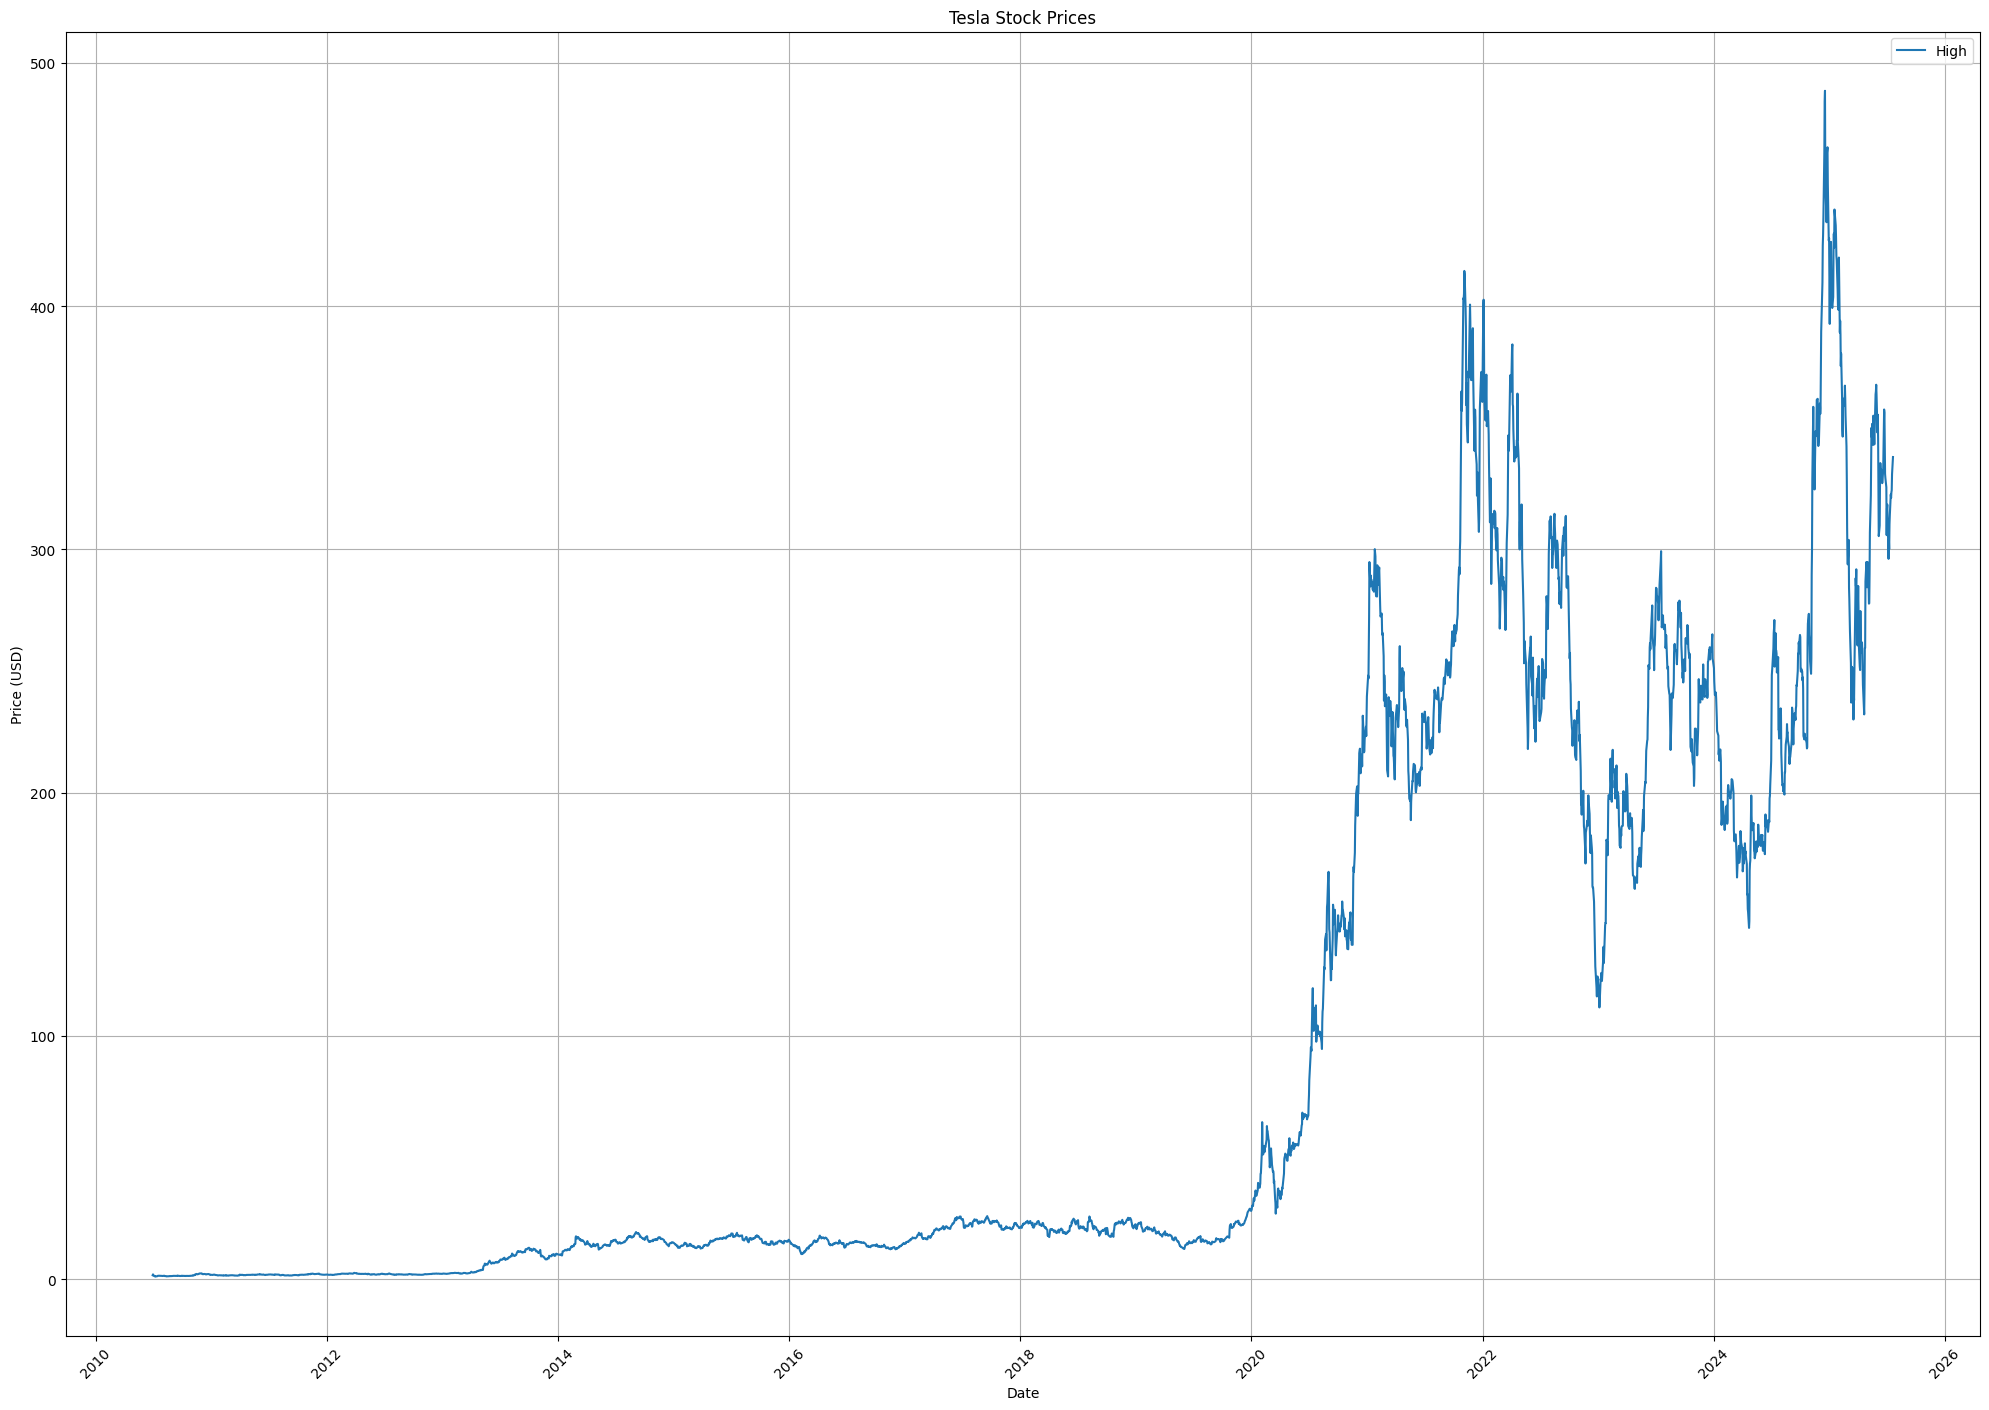

In [193]:
import matplotlib.pyplot as plt

def plot_stock_prices(df, title='Tesla Stock Prices'):
    plt.figure(figsize=(20, 14))
    #plt.plot(df.index, df['Open'], label='Open')
    plt.plot(df.index, df['High'], label='High')
    #plt.plot(df.index, df['Low'], label='Low')
    #plt.plot(df.index, df['Close'], label='Close')
    
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.xticks(rotation=45)
    plt.show()

plot_stock_prices(tesla_data)


In [185]:
url =  "https://companiesmarketcap.com/tesla/revenue/"

html_data = requests.get(url).text

html_parse= BeautifulSoup(html_data, "html.parser")

soup = BeautifulSoup(html_data, "html.parser")

rows = soup.select("h3 + div table.table tbody tr")
data = []
for tr in rows:
    cols = tr.find_all("td")
    year = cols[0].get_text(strip=True).split()[0:3]  #stripping the first 4 characters
    revenue_str = cols[1].get_text(strip=True).replace("$","").replace(" B","")
    revenue = float(revenue_str) * 1e9  # convert billions to full USD
    data.append({"Year": str(year), "Revenue": int(revenue)})

tesla_revenue = pd.DataFrame(data)

tesla_revenue.iloc[0, 0] = 2025  # row 1, first column (Year)

tesla_revenue = tesla_revenue.drop([17,18,19,20])

def convert_year_column_to_int(df, column_name):
    for index in range(len(df)):
        value = df.at[index, column_name]
        # Clean up string representation like "['2024']"
        if isinstance(value, list):
            value = value[0]
        elif isinstance(value, str):
            value = value.replace("[", "").replace("]", "").replace("'", "")
        try:
            df.at[index, column_name] = int(value)
        except ValueError:
            print(f"Could not convert {value} at index {index}")
    return df

tesla_revenue = convert_year_column_to_int(tesla_revenue, 'Year')

tesla_revenue.tail()



    


,Year,Revenue
12,2013,2009999999
13,2012,410000000
14,2011,200000000
15,2010,110000000
16,2009,110000000


In [79]:
gme = yf.Ticker('GME')

gme_data = gme.history(period = 'max')

gme_data.head()



,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
2002-02-14 00:00:00-05:00,1.712707,1.716073,1.670626,1.683250,11021600,0.0,0.0
2002-02-15 00:00:00-05:00,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


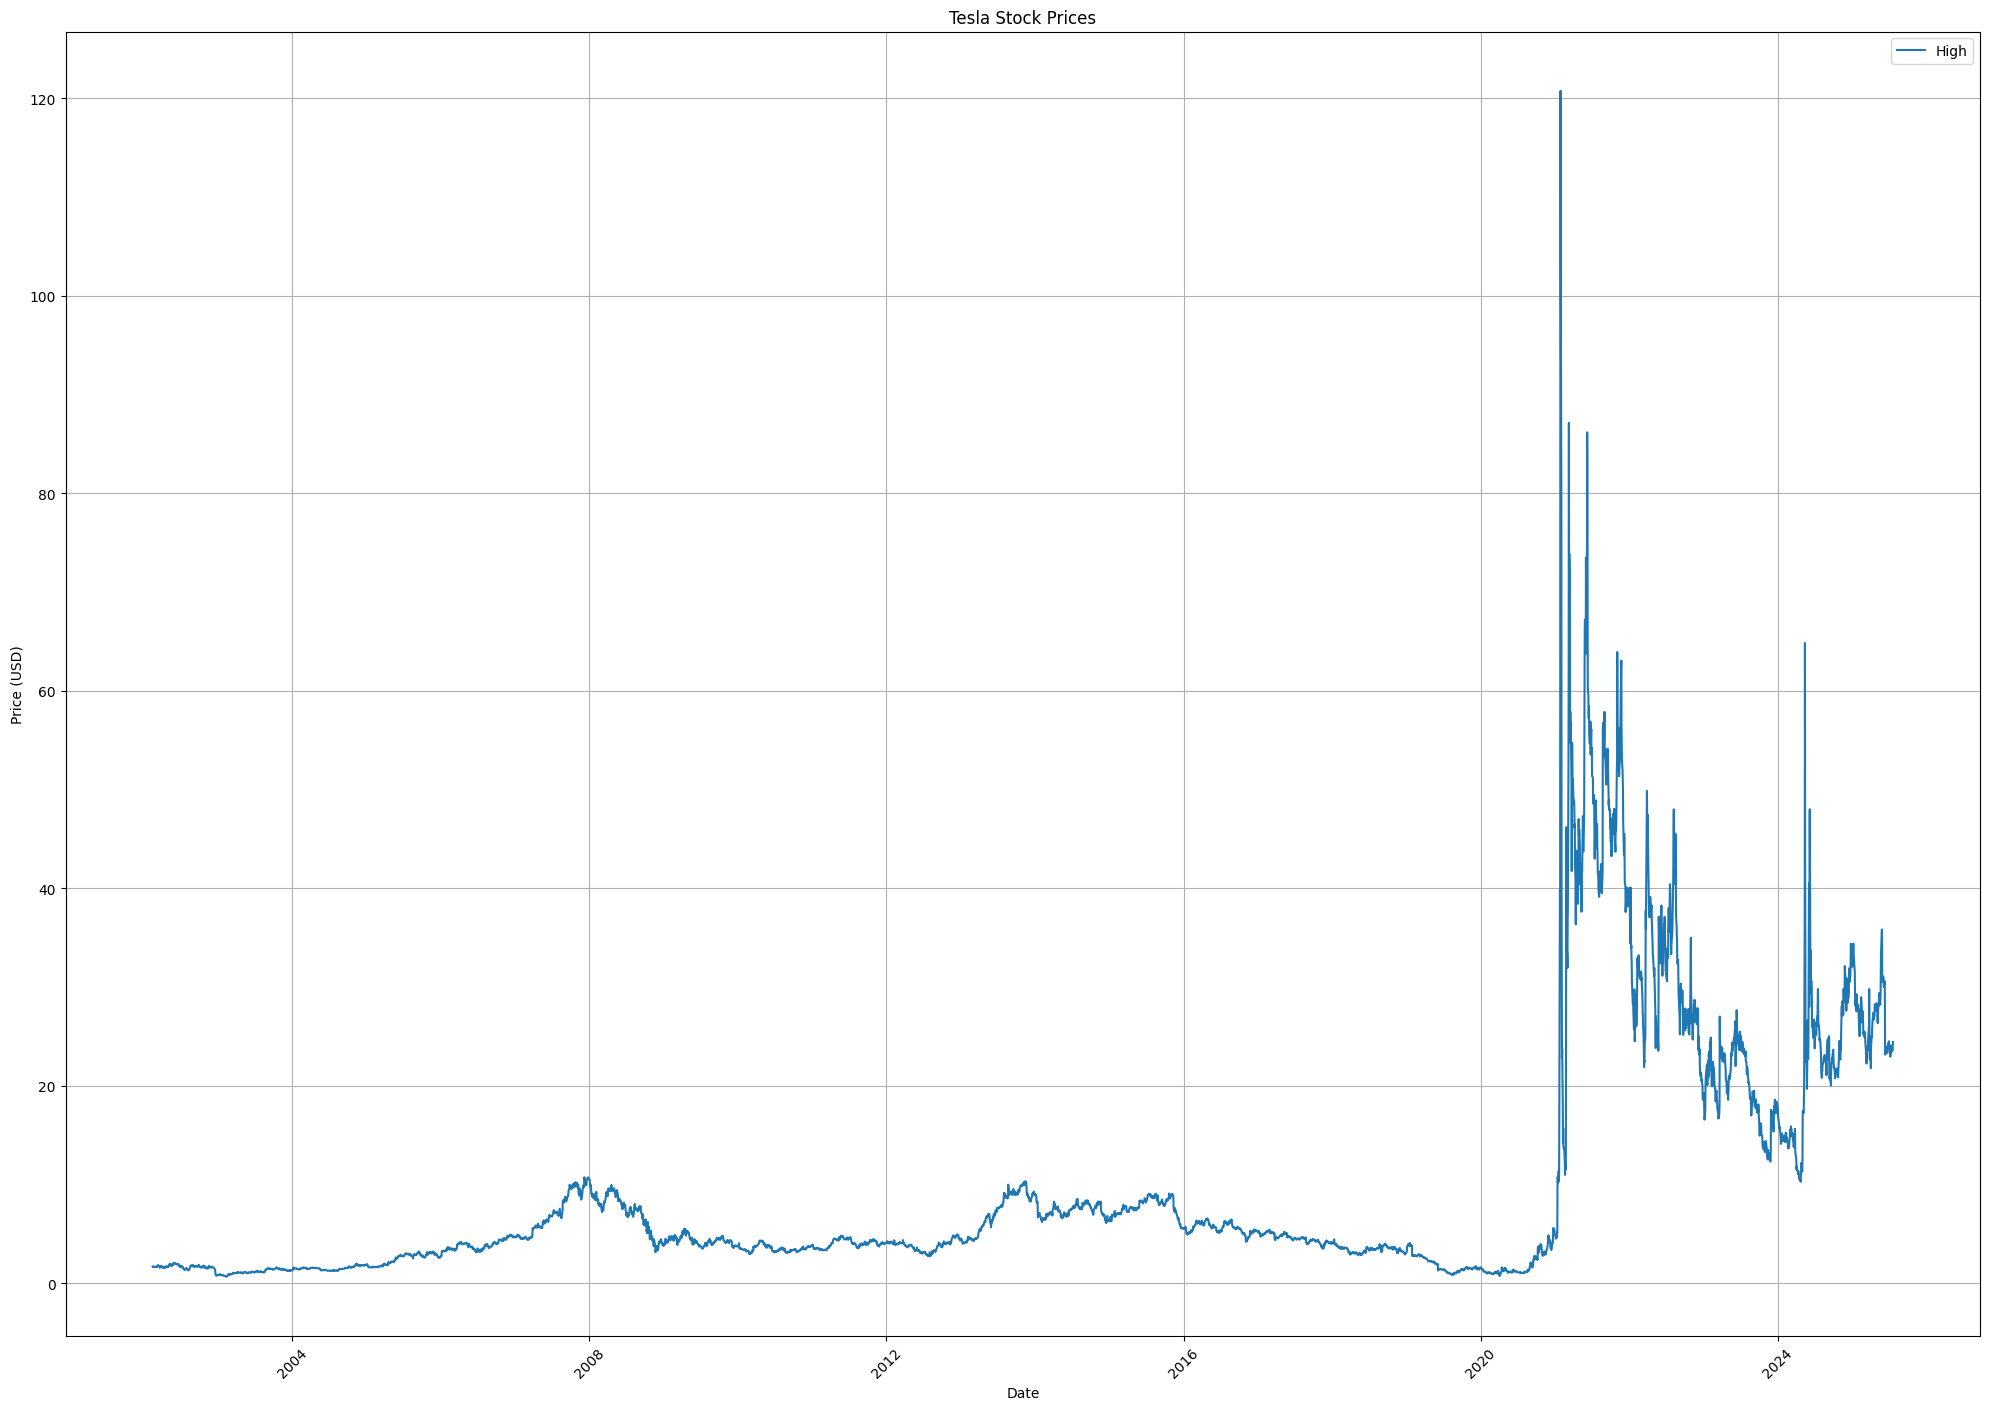

In [194]:
plot_stock_prices(gme_data)

In [82]:
urlgme = 'https://companiesmarketcap.com/eur/gamestop/revenue/'



html_data_gme = requests.get(urlgme).text

html_parse_gme= BeautifulSoup(html_data_gme, "html.parser")

soupgme = BeautifulSoup(html_data_gme, "html.parser")

soupgme

<!DOCTYPE html>

<html lang="en-IE">
<head>
<title>GameStop
 (GME) - Revenue</title>
<meta charset="utf-8"/>
<link href="https://companiesmarketcap.com/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<link href="/img/icons/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
<link href="/img/icons/apple-icon-60x60.png" rel="apple-touch-icon" sizes="60x60"/>
<link href="/img/icons/apple-icon-72x72.png" rel="apple-touch-icon" sizes="72x72"/>
<link href="/img/icons/apple-icon-76x76.png" rel="apple-touch-icon" sizes="76x76"/>
<link href="/img/icons/apple-icon-114x114.png" rel="apple-touch-icon" sizes="114x114"/>
<link href="/img/icons/apple-icon-120x120.png" rel="apple-touch-icon" sizes="120x120"/>
<link href="/img/icons/apple-icon-144x144.png" rel="apple-touch-icon" sizes="144x144"/>
<link href="/img/icons/apple-icon-152x152.png" rel="apple-touch-icon" sizes="152x152"/>
<link href="/img/icons/apple-icon-180x180.png" rel="apple-touch-icon" sizes="180x180"/>
<link href="/img/

In [178]:
rows = soupgme.select("h3 + div table.table tbody tr")
data = []

rows

[<tr><td><span class="year">2025</span> (TTM) <img class="ttm-dates-info-icon info-icon tooltip-title responsive-hidden" src="/img/info-icon-grey.svg" tooltip-position="right" tooltip-title="2 May 2024 - 30 Apr 2025"/></td><td>€3.41 B</td><td class="percentage-red">-7.18%</td></tr>,
 <tr><td><span class="year">2024</span> <img class="ttm-dates-info-icon info-icon tooltip-title responsive-hidden" src="/img/info-icon-grey.svg" tooltip-position="right" tooltip-title="31 Jan 2024 - 31 Jan 2025"/></td><td>€3.67 B</td><td class="percentage-red">-22.98%</td></tr>,
 <tr><td><span class="year">2023</span> <img class="ttm-dates-info-icon info-icon tooltip-title responsive-hidden" src="/img/info-icon-grey.svg" tooltip-position="right" tooltip-title="31 Jan 2023 - 31 Jan 2024"/></td><td>€4.76 B</td><td class="percentage-red">-13.68%</td></tr>,
 <tr><td><span class="year">2022</span> <img class="ttm-dates-info-icon info-icon tooltip-title responsive-hidden" src="/img/info-icon-grey.svg" tooltip-pos

In [179]:

for tr in rows:
    cols = tr.find_all("td")
    year = cols[0].get_text(strip=True).split()[0:3]  #stripping the first 4 characters
    revenue_str_gme = cols[1].get_text(strip=True).replace("€","").replace(" B","")
    revenue_gme = float(revenue_str_gme) * 1e9  # convert billions to full USD
    data.append({"Year": str(year), "Revenue": int(revenue_gme)})

gme_revenue = pd.DataFrame(data)

gme_revenue = gme_revenue.drop([25,26])

gme_revenue

,Year,Revenue
0,['2025(TTM)'],3410000000
1,['2024'],3670000000
2,['2023'],4760000000
3,['2022'],5520000000
4,['2021'],5300000000
5,['2020'],4130000000
6,['2019'],5770000000
7,['2018'],6850000000
8,['2017'],7680000000
9,['2016'],8180000000


In [180]:


gme_revenue.iloc[0, 0] = 2025  # row 1, first column (Year)



def convert_year_column_to_int(df, column_name):
    for index in range(len(df)):
        value = df.at[index, column_name]
        # Clean up string representation like "['2024']"
        if isinstance(value, list):
            value = value[0]
        elif isinstance(value, str):
            value = value.replace("[", "").replace("]", "").replace("'", "")
        try:
            df.at[index, column_name] = int(value)
        except ValueError:
            print(f"Could not convert {value} at index {index}")
    return df

gme_revenue = convert_year_column_to_int(gme_revenue, 'Year')


gme_revenue

,Year,Revenue
0,2025,3410000000
1,2024,3670000000
2,2023,4760000000
3,2022,5520000000
4,2021,5300000000
5,2020,4130000000
6,2019,5770000000
7,2018,6850000000
8,2017,7680000000
9,2016,8180000000


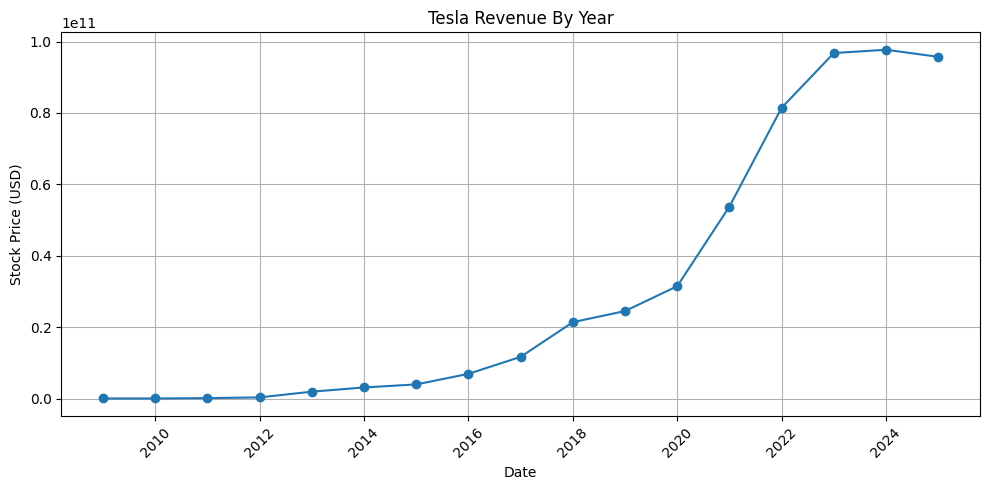

In [181]:
def make_graph(x, y, title):
    plt.figure(figsize=(10, 5))
    plt.plot(x, y, marker='o', linestyle='-')
    plt.title(title)
    plt.xlabel("Date")
    plt.ylabel("Stock Price (USD)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.grid(True)
    plt.show()


make_graph(tesla_revenue['Year'],tesla_revenue['Revenue'], 'Tesla Revenue By Year')

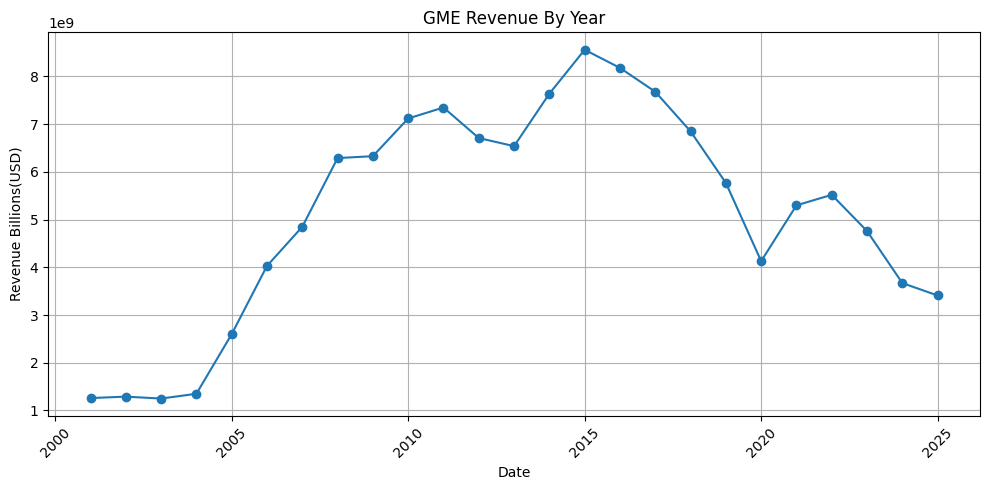

In [184]:
def make_graph(x, y, title):
    plt.figure(figsize=(10, 5))
    plt.plot(x, y, marker='o', linestyle='-')
    plt.title(title)
    plt.xlabel("Date")
    plt.ylabel("Revenue Billions(USD)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.grid(True)
    plt.show()


make_graph(gme_revenue['Year'],gme_revenue['Revenue'], 'GME Revenue By Year')